# Prerequisits

## Python and package managers

As the title indicates, we will be doing all our work in Python. Python has become the de-facto standard language for machine learning and data science, with $R$ being the other major community in the space.
The book will assume that you're at least somewhat familiar with Python, though we won't be needing any advanced features of the language. If you're new to Python, there are plenty of resources online.
In particular for data science, I highly recommend the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas, which discusses the environments and libraries described below in much more detail.

```{margin}
If you don't want to get the whole Anaconda package you which you can also get conda by installing [miniconda](https://docs.conda.io/en/latest/miniconda.html). You can also stick to ``pip`` if you don't want to mess with two package managers, though using conda often makes things a bit easier.
```

If you don't have a working installation of Python, the easiest way to get one is probably by downloading the free [Anaconda Python distribution](https://www.anaconda.com/products/individual), which is available for Windows, Linux and OS X.
Make sure to get the latest version of Python (3.7 as of this writing, 3.6 is still fine, I wouldn't use anything older) and the 64 bit version. Anaconda comes with the ``conda`` package manager which is a widely used alternative to the standard python package manager ``pip``.
Whether you use Anaconda or not, make sure you create a new virtual environment for your data science work. In particular, **don't use your system Python**, i.e. the one that is installed by your operating system. Trying to install data science packages into your system Python is a great way to mess up the normal functioning of your computer.

## Jupyter Notebooks
Jupyter is an interactive, browser-based coding environment that lends itself amazingly well for the iterative, exploratory process of data science.
It also enables literate programming by mixing code with other media, like markdown text.
In fact, this book has been written entirely in Jupyter notebook, and it's available in it's entirety at [github.com/amueller/aml](https://github.com/amueller/aml). While you can use an IDE such as Spyder, PyCharm or VSCode, which all have great Python support, I recommend using Jupyter, or the newer iteration of the interface, Jupyter Lab for working through the examples in this book and starting your machine learning journey.

```{margin}
A great feature of Jupyter is to allow running code cells out of order.
However, that can make it hard to reproduce some experiments. It's a good idea to do a "restart kernel and run all cells" periodically to see that your code is complete and your experiments reproduce.
```
For more extensive projects, and for production use, using standard Python scripts is beneficial, as they are more easily managed with version control and more easily tested. At what point you should transition from notebooks to Python scripts, and which is better for what purpose, is the topic of a lively debate within the PyData community.

If you are using Anaconda, you should be able to start Jupyter Lab from a console by executing ``jupyter lab`` (on any operating system), or via the Anaconda navigator (on OS X and Windows).


## Managing Python environments
Whether you're using Jupyter or an IDE and whether you're using Anaconda or not, working with multiple Python environments is often a source of frustration for those that are new to Python (or even those that have been working with it for years).
Whenever you install a package, it is installed into a particular *Python virtual environment* that corresponds to a particular version of Python together with a set of installed libraries. You can think of it as a light variant of a container or virtual machine.
It's very likely that your machine has more than one Python environment, and if you run a ``pip`` or ``conda`` command on the command line, it might run in a different environment than what is used in your Jupyter Notebooks, which again might be different from what is used in your IDE.
The most common symptom of this is your IDE or Jupyter complaining ``no package sklearn`` when you just ran ``conda install sklearn`` and it successfully installed.
IDEs with good Python support, like the ones I mentioned above, allow you to configure easily which environment you want to run your code in. Jupyter has the concept of *kernels* which allow you to run code in different environments.
A great overview of the topic is provided in the blogpost [Installing Python packages for Jupyter](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) by Jake VanderPlas.

## Hosted platforms
If you don't want to (or can't) setup a Python environment on your machine, there are many options for hosted environments, often with substantial computational power.
Most cloud providers offer free hosted Jupyter notebooks, notably [Google Colab](https://colab.research.google.com/) (which even allows free access to GPUs), [Azure Notebooks](https://notebooks.azure.com/), and [Amazon SageMaker](https://aws.amazon.com/sagemaker/) (which only seems to have a very limited free offering). A more community driven effort is [binder](https://mybinder.org/), and there are countless other platforms that provide (sometimes free) access to hosted Jupyter notebooks. Worth mentioning here are [kaggle kernels](https://www.kaggle.com/kernels), which are an integration of Colab into the Kaggle machine learning community, where many interesting data science and machine learning applications are posted (with a wide spectrum of quality).
As of this writing, both Google Colab and Azure notebooks provide ready-to-use solutions that require basically no effort to get started.

## Packages
Now that you have your environment up and running and picked your interface of choice, I want to discuss the libraries we will be using. If you're using anaconda or any of the hosted services, they will already be installed for you.``

### NumPy
[NumPy](https://numpy.org/doc/1.18/user/quickstart.html) is the Python library that provides efficient implementation of multi-dimensional arrays. NumPy ndarrays are the internal data structure used for most of scikit-learn, and we will be using it extensively in this book.
I will assume you are familiar with array creation and indexing, which you can read up on [in the documentation](https://numpy.org/devdocs/user/basics.indexing.html).

In [45]:
import numpy as np
# create a diagonal matrix with ones on the diagonal that's 5x5
X = np.eye(7)
# show the result in Jupyter
X

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [46]:
# show the class of X, and the shape of X
print(type(X), X.shape)

<class 'numpy.ndarray'> (7, 7)


### SciPy
Another fundamental library that provides data structures and algorithm is [SciPy](https://docs.scipy.org/doc/scipy/reference/). SciPy is a bit of a hodge-pot of many different scientific algorithms, but we will mostly use it for its implementation of sparse matrices, i.e. two-dimensional arrays where most entries are zero.

In [70]:
import scipy as sp
# If a matrix has many zeros, sparse matrices are an efficient representation.
# We're creating a matrix in the Compressed Sparse Row (CSR) format from the diagonal numpy array X
X_sp = sp.sparse.csr_matrix(X)
X_sp

<7x7 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [48]:
# Scipy sparse matrices can be converted to numpy arrays with the toarray method
# This is usually a bad idea, as it requires much more memory than the sparse representation,
# but can be useful for debugging.
X_sp.toarray()

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

### Matplotlib
[Matplotlib](https://matplotlib.org/index.html) is the primary plotting library in Python, and we'll use it extensively for most of our visualization needs. I'm a big fan of visual exploration of data and visual teaching, so the book might contain more matplotib code than scikit-learn code.
Mtplotlib is the foundation of most plotting in Python, but sometimes it's more convenient to use more specialized visualization tools build on top of matplotlib. Pandas and scikit-learn have built-in plotting functionality that used matplotlib under the hood.
Understanding matplotlib is important to use these tools well.
There are alternative plotting libraries for Python, in particular altair, plotly and bokeh. All three are much more recent than matplotlib, and altair and plotly are particularly designed for data science applications, while matplotlib was designed more broadly for scientific plotting. So you might find them more convenient to use. For this book, we'll stick with matplotlib as it's mature and widely used.
It's important to know that while pandas plotting builds on matplotlib, matplotlib knows nothing about pandas, and always operates on the underlying numpy arrays.

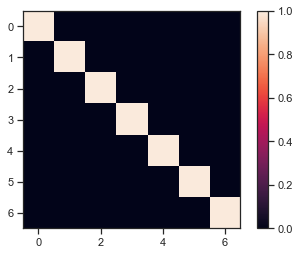

In [49]:
import matplotlib.pyplot as plt
# show a heat map plot of the diagonal numpy array
plt.imshow(X)
# add a color bar to the plot
plt.colorbar()

axes.shape (2, 3)


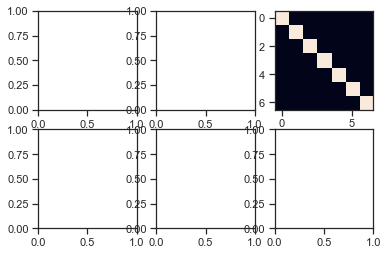

In [50]:
# I love using subplots! It allows you to create regular grids of plots.
# The whole thing is called the figure, while each subplot is called and axes (not axis)
figure, axes = plt.subplots(2, 3)
# axes is a numpy array of shape 2 x 3:
print("axes.shape", axes.shape)
# instead of using plt.matshow, we can directly plot into one of the axes:
axes[0, 2].imshow(X)

### Pandas
[Pandas](https://pandas.pydata.org/pandas-docs/stable/) is maybe the most widely use package in datascience in Python. It builds upon NumPy and provides the ``DataFrame`` datastructure, which is a convenient representation of a table, including column names and row indices.
In contrast to NumPy ndarrays, which assume all entries have the same data type (aka ``dtype``, such as float or int), pandas allows each column in the data to have a different ``dtype``. Pandas also extends the handling of missing values and implements a categorical data type (which doesn't exit in NumPy). Pandas also contains functionality for processing and merging tables, data visualization and reading and writing common data formats and databases.
We will represent most of the data in the book using pandas.

In [53]:
# often you'll read your data from disk, but you can also create it in other ways
import pandas as pd
# we can create a dataframe from a numpy ndarray
X_df = pd.DataFrame(X)
# the resulting dataframe will have numbered rows and columns
X_df

0    1    2    3    4    5    6
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  1.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [56]:
# often, giving names is nicer
X_df_named = pd.DataFrame(X, columns=['first', 'second', 'third', 'fourth',
                                      'fifth', 'sixth', 'seventh'])
# If our dataset is big, we also might want to limit the number of rows shown
# The easiest way for that is using the head method, which by default gives us the first 5 rows
X_df_named.head()

first  second  third  fourth  fifth  sixth  seventh
0    1.0     0.0    0.0     0.0    0.0    0.0      0.0
1    0.0     1.0    0.0     0.0    0.0    0.0      0.0
2    0.0     0.0    1.0     0.0    0.0    0.0      0.0
3    0.0     0.0    0.0     1.0    0.0    0.0      0.0
4    0.0     0.0    0.0     0.0    1.0    0.0      0.0

In [61]:
# Another favorite is creating dataframes from dictionaries of one-dimensional arrays.
# We create two columns, with 1000 entries each, using two different random number distributions
X_dict2df = pd.DataFrame({'uniform random numbers': np.random.uniform(size=1000),
                          'normally distributed random numbers': np.random.normal(size=1000)})
X_dict2df

uniform random numbers  normally distributed random numbers
0                  0.313737                             1.603174
1                  0.919483                            -1.199323
2                  0.238195                             0.991240
3                  0.677885                            -0.381042
4                  0.691179                            -1.871079
..                      ...                                  ...
995                0.803233                             0.160784
996                0.399651                            -1.440656
997                0.006092                             0.582749
998                0.953888                             1.532094
999                0.443370                             1.032746

[1000 rows x 2 columns]

Text(0, 0.5, 'counts')

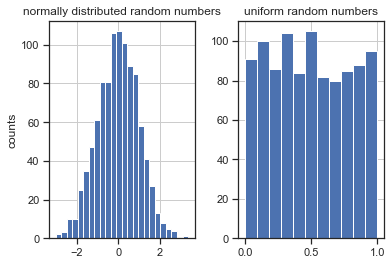

In [69]:
# pandas has some convenient built-in plotting which automatically labels everything.
# Here we compute a histogram for each column.
# By default, hist uses 10 bins, instead we pick them automagically
axes = X_dict2df.hist(bins='auto')

# pandas plotting returns the matplotlib axes that were created, and we can modify them afterwards
axes[0, 0].set_ylabel("counts")

### Seaborn
[Seaborn](http://seaborn.pydata.org/) is a plotting library that provides read-made statistical data visualizations, using matplotlib and pandas.
In some ways, the package is quite opinionated, which makes some complex plots very easy, and generates beautiful plots.
However, while seaborn is very powerful, it might sometimes be a bit tricky to arrive at exactly the plot you're looking for sometimes. There are some [great tutorials](http://seaborn.pydata.org/tutorial.html) to get you started, though.

In [71]:
# seaborn is traditionally imported as sns. Better not ask why.
import seaborn as sns

# we're loading the built-in diamonds dataset into a pandas DataFrame
# it contains prices and quality criteria for thousands of diamond sales. 
diamonds = sns.load_dataset("diamonds")
print(diamonds.columns)
print(diamonds.shape)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
(53940, 10)


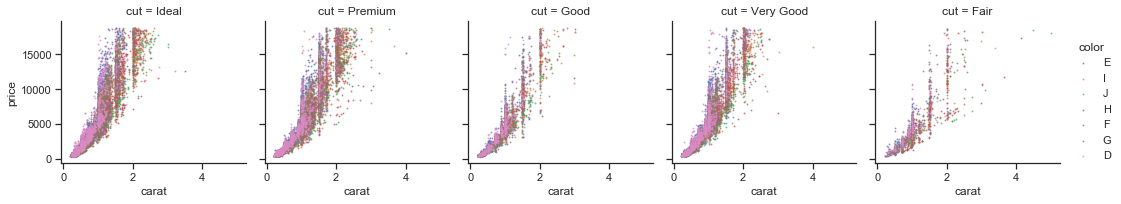

In [57]:
# creating a FacetGrid allows grouping the data
# and mapping columns to rows, columns or hue
g = sns.FacetGrid(diamonds, col="cut", hue="color")
# each entry then calls a plot command for the particular group
# Here we're calling scatter, specify the columns for each axis.
# We also pass parameters 's' for marker size and 'alpha' for transparency
# to reduce overplotting (somewhat).
g.map(plt.scatter, "carat", "price", s=1, alpha=.6)
# a legend is added elegantly only once per grid
g.add_legend();

### Scikit-learn
How to use [scikit-learn](http://scikit-learn.org/) will be the main topic of this book, and we will run though most of the functionality in detail in later chapters.
Scikit-learn provides machine learning algorithms in a simple, consistent interface. Scikit-learn focusses has both supervised and unsupervised learning, though no active learning or reinforcement learning is included. Scikit-learn mostly deals with tabular data, though it has some basic text processing capabilities, which we'll discuss in chapter TODO. Apart from machine learning algorithms, scikit-learn also contains tools for data preprocessing, model evaluation and model selection.
While scikit-learn has a wide varity of algorithms and tools, it does not include algorithms for time series, and neither does it provide modern deep learning algorithms.
It's important to note that while scikit-learn accepts pandas DataFrames as inputs, most of scikit-learn is not aware of the additional information that is represented in the dataframe, such a column names or row indices, and just operates on the underlying NumPy ndarray.

### Versions used

```{margin}
If you're adventurous, I encourage you to try out the development version of scikit-learn, which often has more features. Your feedback on the development version will help scikit-learn to become better.
You can find instructions on [how to install the nightly build on the scikit-learn website](https://scikit-learn.org/dev/developers/advanced_installation.html#installing-nightly-builds).
The documentation for the development version is hosted at [scikit-learn.org/dev](https://scikit-learn.org/dev).
```

This book was run with the following versions:

In [4]:
from sklearn import show_versions
show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\t3kci\anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.2.0.post20200511
   sklearn: 0.24.dev0
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.17
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


However, it is likely to run with many other configurations. The most important part is to make sure to use the most recent version of scikit-learn, which is 0.23 of this writing.